In [84]:
import random
import numpy as np
import matplotlib.pyplot as plt

We store the data as a size $ N \times p $ numpy array. Nothing is optimized; this is purely to test my understanding of the algorithm.

In [75]:
data_size = 300
data1 = np.random.multivariate_normal((0, 0), 0.5 * np.identity(2), size=200)
angles = 2 * np.pi * np.random.uniform(size=500)
data2 = (5 + np.random.normal(0, 0.5, size=500))[:, np.newaxis] * np.column_stack([np.cos(angles), np.sin(angles)])

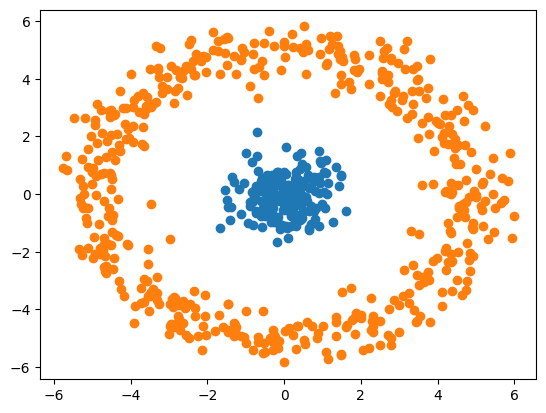

In [76]:
plt.scatter(data1[:,0], data1[:,1])
plt.scatter(data2[:,0], data2[:,1])

This dataset would be troublesome for an algorithm like K-means clustering. Let's implement dbscan and see how it works.

In [91]:
def get_neighbors(data, index, epsilon):
    neighbors = set()
    for i, row in enumerate(data):
        if i != index and np.linalg.norm(row - data[index]) < epsilon:
            neighbors.add(i)
    return neighbors

def is_core_point(data, index, min_pts, epsilon):
    count = 0
    for i, row in enumerate(data):
        if i != index and np.linalg.norm(row - data[index]) < epsilon:
            count += 1
    return count >= min_pts

def get_core_points(data, min_pts, epsilon):
    core_pts = set()
    for i in range(data.shape[0]):
        if is_core_point(data, i, min_pts, epsilon):
            core_pts.add(i)
    return core_pts

In [92]:
def spread(data, point, epsilon, cluster, clusters, core_points):
    clusters[point] = cluster
    for point in get_neighbors(data, point, epsilon):
        if point not in clusters:
            clusters[point] = cluster
            if point in core_points:
                spread(data, point, epsilon, cluster, clusters, core_points)

def dbscan(data, min_pts, epsilon):
    clusters = {}
    cluster_num = 0

    core_points = get_core_points(data, min_pts, epsilon)
    for point in core_points:
        if point not in clusters:
            spread(data, point, epsilon, cluster_num, clusters, core_points)
            cluster_num += 1

    for point in range(data.shape[0]):
        if point not in clusters:
            clusters[point] = -1

    return clusters

        

In [119]:
data = np.concatenate((data1, data2), axis=0)
min_pts = 3
epsilon = 0.7

clusters = dbscan(data, min_pts, epsilon)

In [120]:
print(clusters)

{0: 0, 1: 0, 129: 0, 2: 0, 132: 0, 5: 0, 3: 0, 128: 0, 4: 0, 6: 0, 9: 0, 130: 0, 141: 0, 137: 0, 131: 0, 134: 0, 11: 0, 14: 0, 142: 0, 136: 0, 135: 0, 7: 0, 133: 0, 139: 0, 8: 0, 138: 0, 13: 0, 15: 0, 144: 0, 17: 0, 10: 0, 143: 0, 16: 0, 146: 0, 12: 0, 140: 0, 148: 0, 21: 0, 154: 0, 152: 0, 153: 0, 22: 0, 145: 0, 18: 0, 30: 0, 27: 0, 23: 0, 149: 0, 147: 0, 20: 0, 151: 0, 24: 0, 25: 0, 155: 0, 19: 0, 32: 0, 97: 0, 163: 0, 33: 0, 29: 0, 39: 0, 26: 0, 157: 0, 168: 0, 164: 0, 156: 0, 37: 0, 159: 0, 176: 0, 38: 0, 161: 0, 36: 0, 167: 0, 34: 0, 162: 0, 67: 0, 41: 0, 174: 0, 44: 0, 165: 0, 42: 0, 40: 0, 158: 0, 160: 0, 35: 0, 166: 0, 43: 0, 169: 0, 170: 0, 171: 0, 47: 0, 175: 0, 178: 0, 45: 0, 172: 0, 177: 0, 179: 0, 50: 0, 53: 0, 180: 0, 54: 0, 49: 0, 173: 0, 52: 0, 55: 0, 56: 0, 182: 0, 51: 0, 77: 0, 69: 0, 75: 0, 64: 0, 109: 0, 108: 0, 183: 0, 58: 0, 181: 0, 57: 0, 59: 0, 188: 0, 31: 0, 102: 0, 107: 0, 127: 0, 198: 0, 117: 0, 185: 0, 189: 0, 62: 0, 63: 0, 65: 0, 61: 0, 195: 0, 192: 0, 186:

In [121]:
cluster_dict = {}
for point in clusters:
    cluster_num = clusters[point]
    if cluster_num not in cluster_dict:
        cluster_dict[cluster_num] = []
    cluster_dict[cluster_num].append(point)

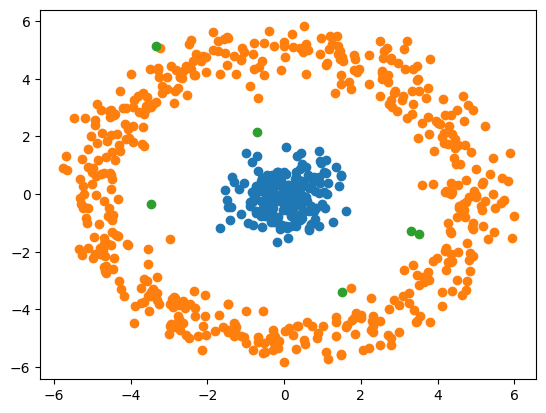

In [122]:
for cluster_num in cluster_dict:
    data_cl = data[cluster_dict[cluster_num]]
    plt.scatter(data_cl[:,0], data_cl[:,1])
